First few rows of the dataset:
  Code      UIC            Bahnhof Kanton ISB_GI  Jahr   DTV   DWV  DNWV  EVU  \
0  AAT  8503124             Aathal     ZH    SBB  2018   740   800   610  SBB   
1   AB  8507472         Ausserberg     VS    BLS  2018   180   160   210  BLS   
2  ABE  8504404            Aarberg     BE    SBB  2022   520   580   400  BLS   
3  ABE  8504404            Aarberg     BE    SBB  2023   580   620   460  BLS   
4  ABO  8502000  Aarburg-Oftringen     AG    SBB  2022  2500  2900  1500  SBB   

        lon        lat  
0  8.765625  47.335959  
1  7.844167  46.312348  
2  7.278693  47.044541  
3  7.278693  47.044541  
4  7.908223  47.320268  
Dataset Overview:
Number of rows: 3470
Number of columns: 12
Column Names: ['Code', 'UIC', 'Bahnhof', 'Kanton', 'ISB_GI', 'Jahr', 'DTV', 'DWV', 'DNWV', 'EVU', 'lon', 'lat']

Missing Values:
Code       0
UIC        0
Bahnhof    0
Kanton     0
ISB_GI     0
Jahr       0
DTV        0
DWV        0
DNWV       0
EVU        0
lon        0

<Figure size 1400x700 with 0 Axes>

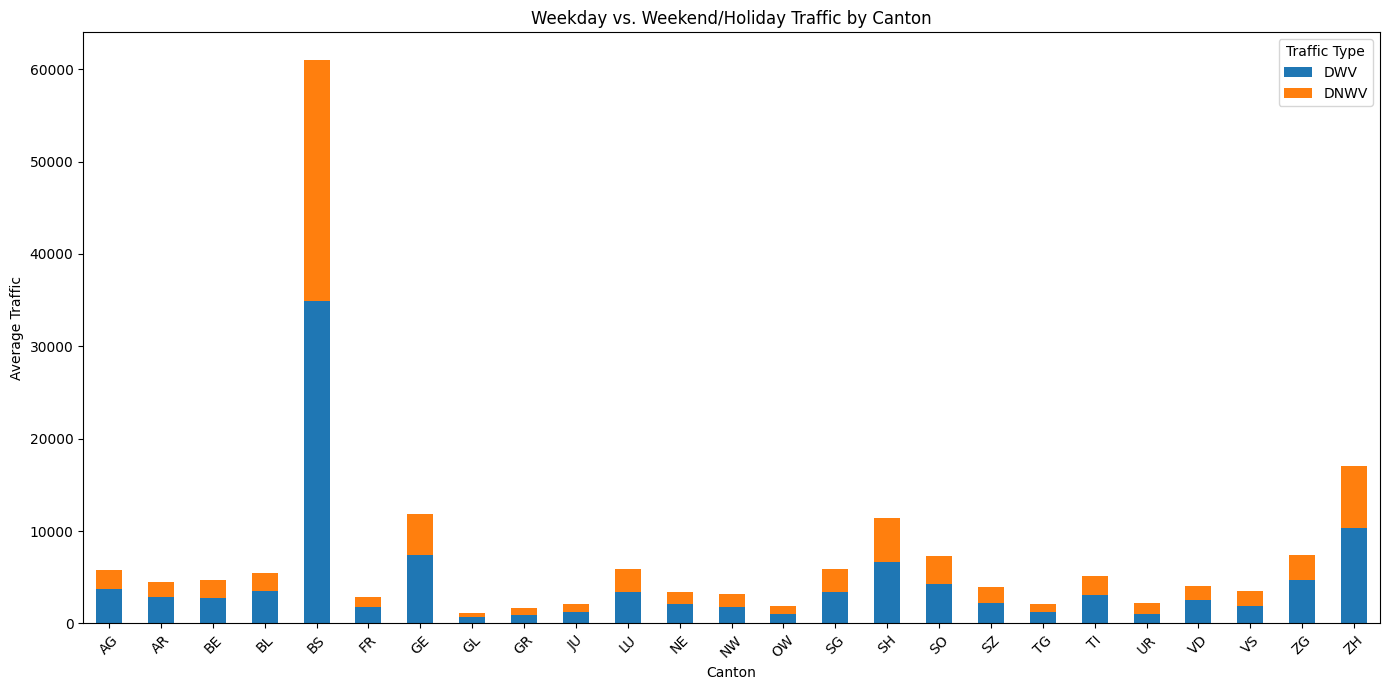

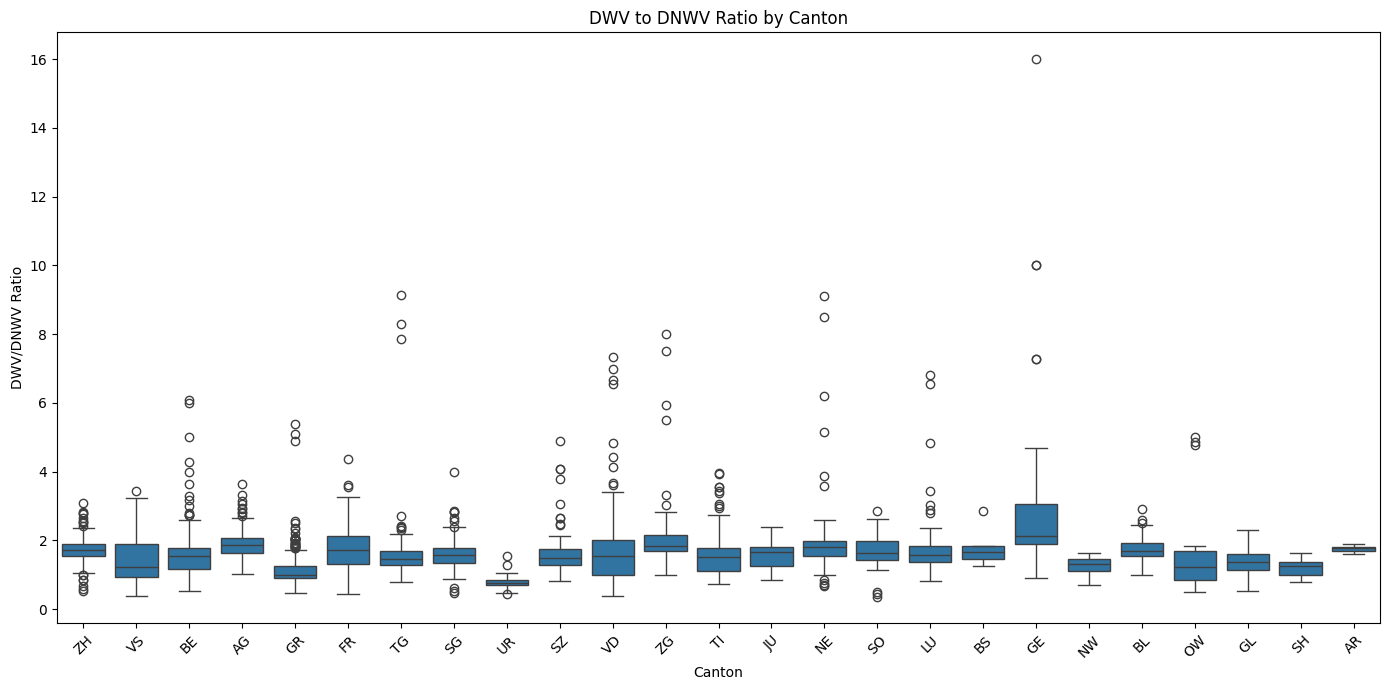

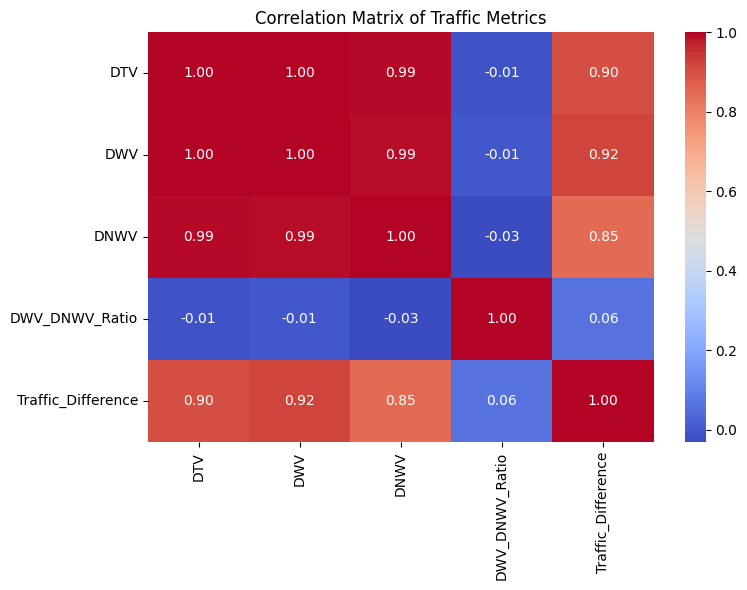

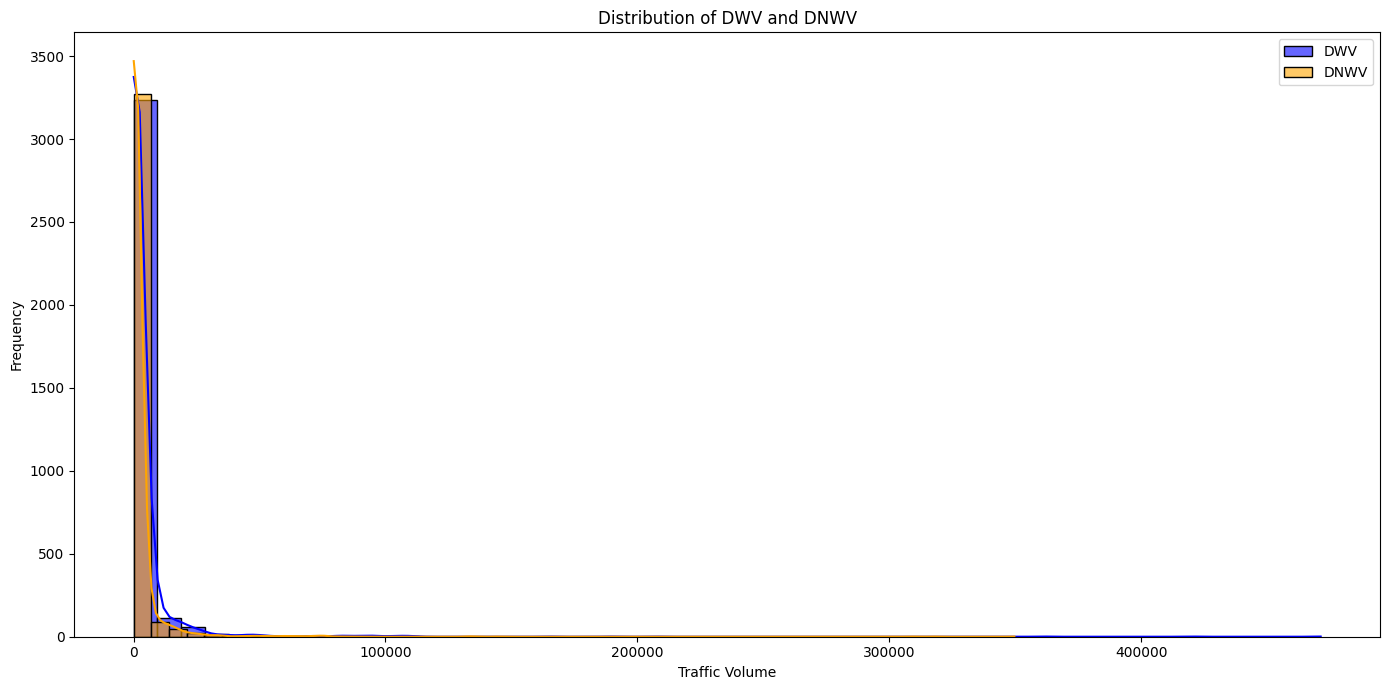

C:\Users\Fabian\AppData\Local\Temp\ipykernel_18576\2014223967.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stations, x='Bahnhof', y='DTV', palette='viridis')


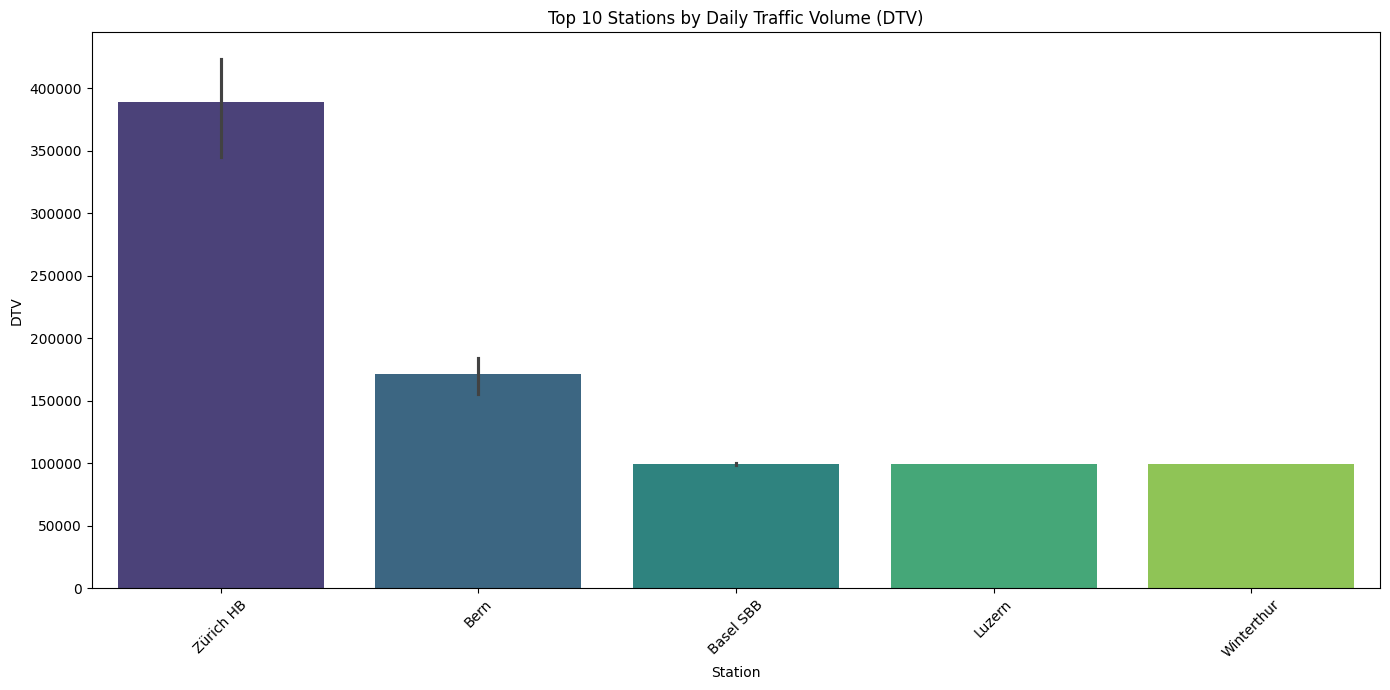


Canton with highest weekday traffic (DWV): BS
Canton with highest weekend/holiday traffic (DNWV): BS

Distribution of DWV to DNWV Ratios:
count    3470.000000
mean        1.622159
std         0.780232
min         0.368421
25%         1.198486
50%         1.567117
75%         1.863636
max        16.000000
Name: DWV_DNWV_Ratio, dtype: float64

Key Observations:
1. Significant differences in DWV and DNWV are observed across cantons.
2. Some cantons show a higher DWV to DNWV ratio, indicating weekday traffic dominance.
3. Correlation analysis shows strong relationships between DTV, DWV, and DNWV.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Data Overview
print("Dataset Overview:")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("Column Names:", list(data.columns))

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop duplicates
data = data.drop_duplicates()
print("\nDataset after removing duplicates:")
print(data.shape)

# Data type information
print("\nData Types:")
print(data.dtypes)

# Convert relevant columns to numeric if needed
for col in ['DTV', 'DWV', 'DNWV']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in traffic columns
data = data.dropna(subset=['DTV', 'DWV', 'DNWV'])

# Summarize numeric columns
print("\nSummary Statistics:")
print(data[['DTV', 'DWV', 'DNWV']].describe())

# Enrich Data: Create new columns
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']
data['Traffic_Difference'] = data['DWV'] - data['DNWV']

# Aggregate data by Canton
canton_grouped = data.groupby('Kanton').mean(numeric_only=True)[['DTV', 'DWV', 'DNWV']]

# Traffic Patterns by Canton
print("\nTraffic Patterns by Canton:")
print(canton_grouped)

# Visualization: Compare DWV and DNWV across cantons
plt.figure(figsize=(14, 7))
canton_grouped[['DWV', 'DNWV']].plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Weekday vs. Weekend/Holiday Traffic by Canton')
plt.xlabel('Canton')
plt.ylabel('Average Traffic')
plt.xticks(rotation=45)
plt.legend(title="Traffic Type")
plt.tight_layout()
plt.show()

# Visualization: Boxplot of DWV/DNWV ratio by canton
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Kanton', y='DWV_DNWV_Ratio')
plt.title('DWV to DNWV Ratio by Canton')
plt.xlabel('Canton')
plt.ylabel('DWV/DNWV Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for correlation
correlation_matrix = data[['DTV', 'DWV', 'DNWV', 'DWV_DNWV_Ratio', 'Traffic_Difference']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Traffic Metrics')
plt.tight_layout()
plt.show()

# Additional Visualizations
# Distribution of DWV and DNWV
plt.figure(figsize=(14, 7))
sns.histplot(data['DWV'], bins=50, kde=True, color='blue', label='DWV', alpha=0.6)
sns.histplot(data['DNWV'], bins=50, kde=True, color='orange', label='DNWV', alpha=0.6)
plt.title('Distribution of DWV and DNWV')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Top 10 stations by DTV
top_stations = data.nlargest(10, 'DTV')
plt.figure(figsize=(14, 7))
sns.barplot(data=top_stations, x='Bahnhof', y='DTV', palette='viridis')
plt.title('Top 10 Stations by Daily Traffic Volume (DTV)')
plt.xlabel('Station')
plt.ylabel('DTV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Traffic Analysis Logic
# Calculate the canton with the highest weekday traffic
top_weekday_canton = canton_grouped['DWV'].idxmax()
print(f"\nCanton with highest weekday traffic (DWV): {top_weekday_canton}")

# Calculate the canton with the highest weekend/holiday traffic
top_weekend_canton = canton_grouped['DNWV'].idxmax()
print(f"Canton with highest weekend/holiday traffic (DNWV): {top_weekend_canton}")

# Check distribution of DWV/DNWV ratio
print("\nDistribution of DWV to DNWV Ratios:")
print(data['DWV_DNWV_Ratio'].describe())

# Key Observations from EDA
print("\nKey Observations:")
print("1. Significant differences in DWV and DNWV are observed across cantons.")
print("2. Some cantons show a higher DWV to DNWV ratio, indicating weekday traffic dominance.")
print("3. Correlation analysis shows strong relationships between DTV, DWV, and DNWV.")
